In [15]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from lifelines import CoxPHFitter

def get_most_similar_column(df, query):
    vectorizer = TfidfVectorizer().fit(df.columns)
    vectorized_query = vectorizer.transform([query])
    column_vectors = vectorizer.transform(df.columns)
    similarity_scores = cosine_similarity(column_vectors, vectorized_query)
    most_similar_column = df.columns[np.argmax(similarity_scores)]
    return most_similar_column

csv_paths = ['ICLR2019data.csv', 'ICLR2020data.csv', 'ICLR2021data.csv', 'ICLR2022data.csv']  

all_data = []

for csv_path in csv_paths:
    print(csv_path)
    df = pd.read_csv(csv_path)
    time_col = get_most_similar_column(df, "AvgRating")  # survival time
    event_col = get_most_similar_column(df, "Decision")  # event
    
    # NaN
    df[event_col] = df[event_col].fillna('reject')
    
    df[event_col] = df[event_col].apply(lambda x: 1 if 'ccept' in x.lower() else 0) 
    
    df = df[[time_col, event_col]]
    df.columns = ['duration', 'event']
    all_data.append(df)

data = pd.concat(all_data)
print(data)

ICLR2019data.csv
ICLR2020data.csv
ICLR2021data.csv
ICLR2022data.csv
      duration  event
0         8.67      1
1         8.67      1
2         8.33      1
3         8.33      1
4         8.00      1
...        ...    ...
3257      1.50      0
3258      1.40      0
3259      1.00      0
3260      1.00      0
3261      1.00      0

[10353 rows x 2 columns]


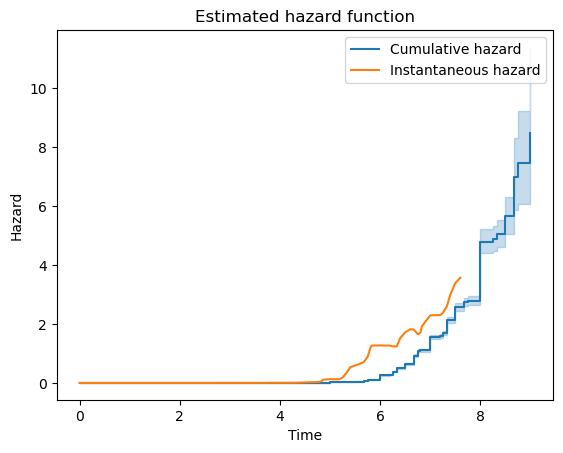

In [16]:
import matplotlib.pyplot as plt
from lifelines import NelsonAalenFitter
from scipy.interpolate import UnivariateSpline

def estimate_hazard_function(df, duration_col, event_col):
    naf = NelsonAalenFitter()
    naf.fit(df[duration_col], event_observed=df[event_col])
    
    # Calculate derivative of cumulative hazard function
    window_size = 10  # Smoothing parameter
    cumulative_hazard_values = naf.cumulative_hazard_.values.ravel()
    cumulative_hazard_times = naf.cumulative_hazard_.index.values
    hazard_derivative = np.gradient(cumulative_hazard_values, cumulative_hazard_times)
    
    # Smooth the derivative using a sliding window
    smoothed_derivative = np.convolve(hazard_derivative, np.ones(window_size), 'valid') / window_size
    smoothed_times = cumulative_hazard_times[: -window_size + 1]
    
    # Plot cumulative hazard function
    naf.plot(label='Cumulative hazard')
    
    # Plot instantaneous hazard function
#     plt.plot(cumulative_hazard_times, hazard_derivative, label='Instantaneous hazard')
    plt.plot(smoothed_times, smoothed_derivative, label='Instantaneous hazard')
    plt.title('Estimated hazard function')
    plt.xlabel('Time')
    plt.ylabel('Hazard')
    plt.legend()
    plt.show()

# Usage
estimate_hazard_function(data, 'duration', 'event')

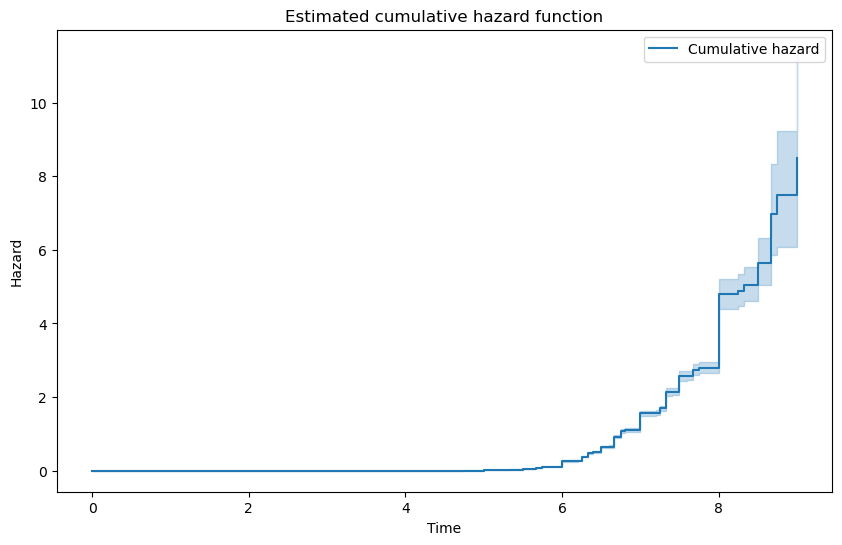

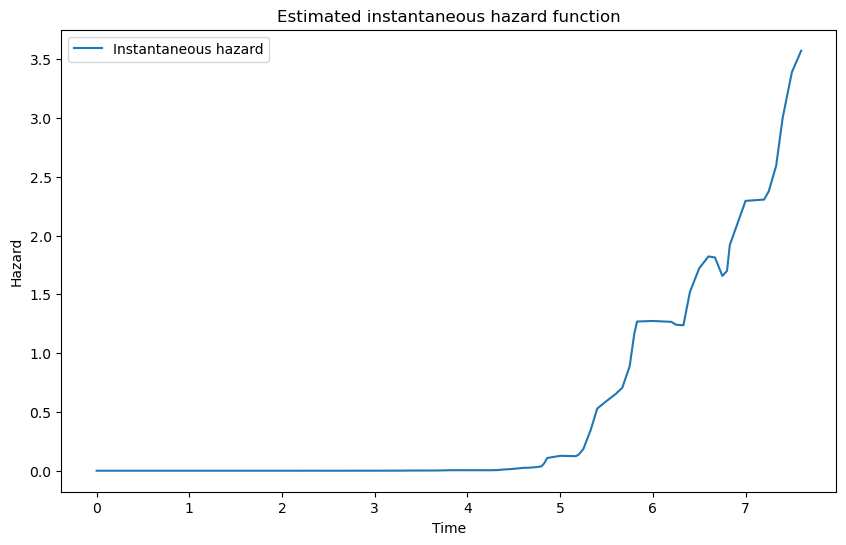

In [22]:
import matplotlib.pyplot as plt
from lifelines import NelsonAalenFitter
from scipy.interpolate import UnivariateSpline

def estimate_hazard_function(df, duration_col, event_col):
    naf = NelsonAalenFitter()
    naf.fit(df[duration_col], event_observed=df[event_col])
    
    # Calculate derivative of cumulative hazard function
    window_size = 10  # Smoothing parameter
    cumulative_hazard_values = naf.cumulative_hazard_.values.ravel()
    cumulative_hazard_times = naf.cumulative_hazard_.index.values
    hazard_derivative = np.gradient(cumulative_hazard_values, cumulative_hazard_times)
    
    # Smooth the derivative using a sliding window
    smoothed_derivative = np.convolve(hazard_derivative, np.ones(window_size), 'valid') / window_size
    smoothed_times = cumulative_hazard_times[: -window_size + 1]
    
    # Plot cumulative hazard function
    plt.figure(figsize=(10,6))
    naf.plot(label='Cumulative hazard')
    plt.title('Estimated cumulative hazard function')
    plt.xlabel('Time')
    plt.ylabel('Hazard')
    plt.legend()
    plt.show()

    # Plot instantaneous hazard function
    plt.figure(figsize=(10,6))
    plt.plot(smoothed_times, smoothed_derivative, label='Instantaneous hazard')
    plt.title('Estimated instantaneous hazard function')
    plt.xlabel('Time')
    plt.ylabel('Hazard')
    plt.legend()
    plt.show()

# Usage
estimate_hazard_function(data, 'duration', 'event')


Best Paper
Best Paper
Best Paper


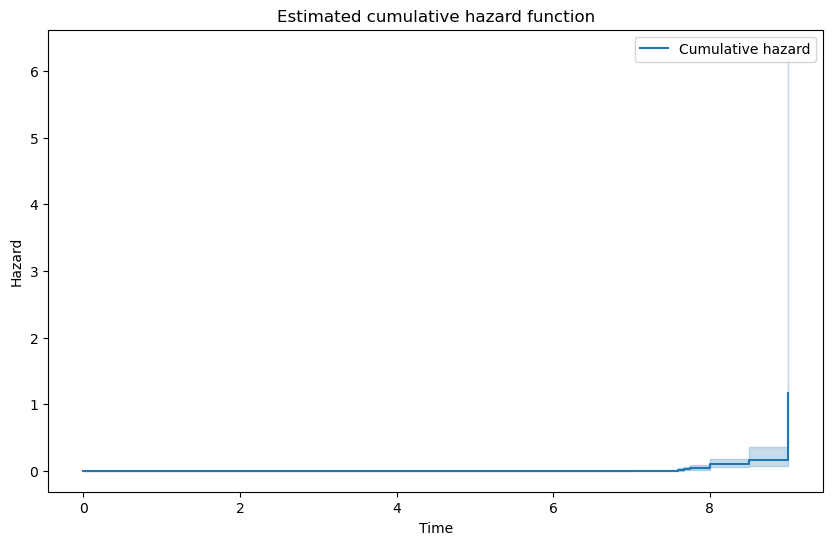

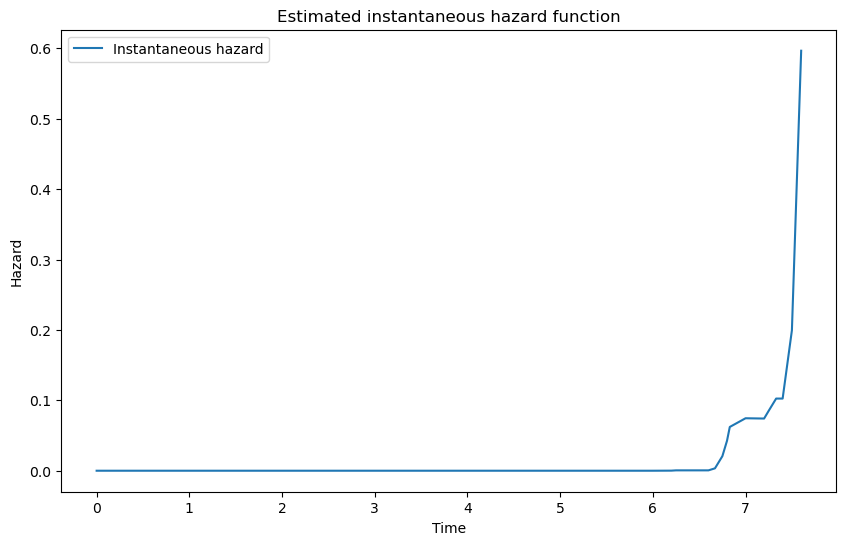

In [23]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from lifelines import KaplanMeierFitter, NelsonAalenFitter
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

csv_paths = ['ICLR2019data.csv',  'ICLR2021data.csv', 'ICLR2022data.csv'] 

all_data = []

for csv_path in csv_paths:
    df = pd.read_csv(csv_path)
    time_col = get_most_similar_column(df, "AvgRating")  # survival time
    event_col = get_most_similar_column(df, "Best Paper")  # event
    print(event_col)
   
    df = df[[time_col, event_col]]
    df.columns = ['duration', 'event']
    all_data.append(df)

data = pd.concat(all_data)

def estimate_hazard_function(df, duration_col, event_col):
    # Fit Nelson Aalen
    naf = NelsonAalenFitter()
    naf.fit(df[duration_col], event_observed=df[event_col])
    
#     df_stats = df.describe()
#     print(df_stats)
    # Calculate derivative of cumulative hazard function
    window_size = 10  # Smoothing parameter
    cumulative_hazard_values = naf.cumulative_hazard_.values.ravel()
    cumulative_hazard_times = naf.cumulative_hazard_.index.values
    hazard_derivative = np.gradient(cumulative_hazard_values, cumulative_hazard_times)
    
    # Smooth the derivative using a sliding window
    smoothed_derivative = np.convolve(hazard_derivative, np.ones(window_size), 'valid') / window_size
    smoothed_times = cumulative_hazard_times[: -window_size + 1]
    
    # Plot cumulative hazard function
    plt.figure(figsize=(10,6))
    naf.plot(label='Cumulative hazard')
    plt.title('Estimated cumulative hazard function')
    plt.xlabel('Time')
    plt.ylabel('Hazard')
    plt.legend()
    plt.show()

    # Plot instantaneous hazard function
    plt.figure(figsize=(10,6))
    plt.plot(smoothed_times, smoothed_derivative, label='Instantaneous hazard')
    plt.title('Estimated instantaneous hazard function')
    plt.xlabel('Time')
    plt.ylabel('Hazard')
    plt.legend()
    plt.show()
    
# Usage
estimate_hazard_function(data, 'duration', 'event')


Decision
Decision
Decision


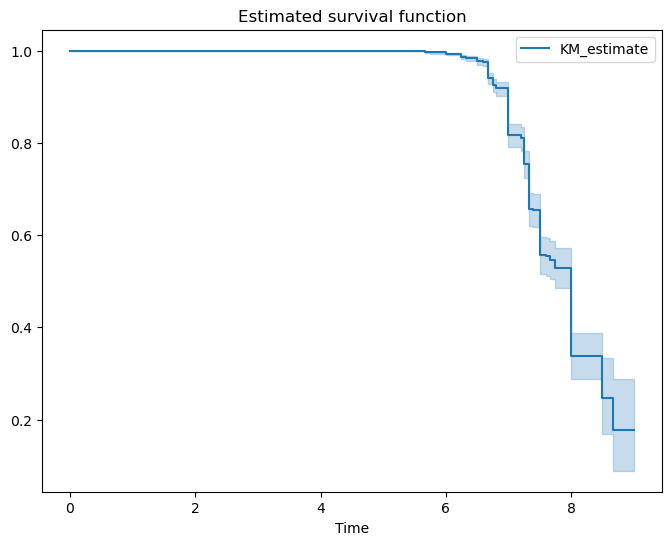

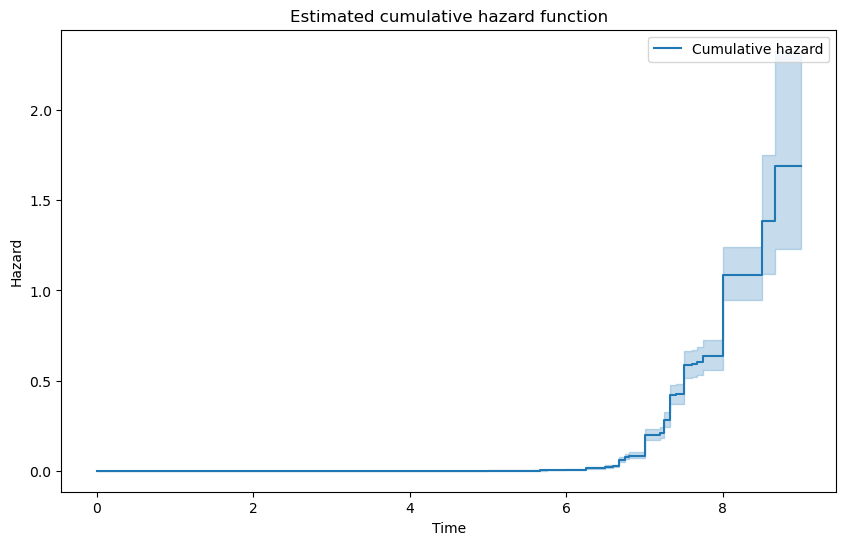

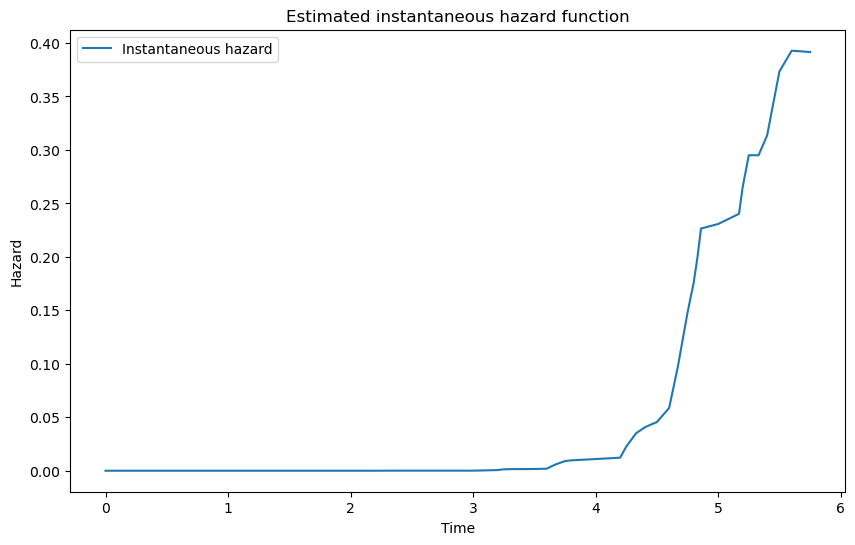

In [37]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from lifelines import KaplanMeierFitter, NelsonAalenFitter
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

def estimate_functions(event_query, event_label,window_size=1):
    csv_paths = ['ICLR2019data.csv', 'ICLR2020data.csv', 'ICLR2021data.csv', 'ICLR2022data.csv'] 
    all_data = []
    if 'best' in str(event_query).lower():
        csv_paths = ['ICLR2019data.csv', 'ICLR2021data.csv', 'ICLR2022data.csv']
    if 'pot' in str(event_label).lower():
        csv_paths = ['ICLR2020data.csv', 'ICLR2021data.csv', 'ICLR2022data.csv']

    for csv_path in csv_paths:
        df = pd.read_csv(csv_path)
        time_col = get_most_similar_column(df, "AvgRating")  
        event_col = get_most_similar_column(df, event_query)  
        print(event_col)

        if isinstance(event_label, str):
            df[event_col] = df[event_col].apply(lambda x: 1 if event_label in str(x).lower() else 0)
        else:
            df[event_col] = df[event_col].apply(lambda x: 1 if x == event_label else 0)
        
        df = df[[time_col, event_col]]
        df.columns = ['duration', 'event']
        all_data.append(df)

    data = pd.concat(all_data)
#     print(data)
#     df_stats = data.describe()
#     df_counts = df.apply(pd.Series.value_counts)
#     print(df_counts)
#     print(df_stats)
    # Fit Kaplan Meier
    kmf = KaplanMeierFitter()
    kmf.fit(data['duration'], event_observed=data['event'])

    # plot Survival function
    plt.figure(figsize=(8, 6))
    kmf.plot()
    plt.title('Estimated survival function')
    plt.xlabel('Time')
    plt.show()

    # Fit Nelson Aalen
    naf = NelsonAalenFitter()
    naf.fit(data['duration'], event_observed=data['event'])

    # Calculate derivative of cumulative hazard function
    cumulative_hazard_values = naf.cumulative_hazard_.values.ravel()
    cumulative_hazard_times = naf.cumulative_hazard_.index.values
    hazard_derivative = np.gradient(cumulative_hazard_values, cumulative_hazard_times)
    
    # Smooth the derivative using a sliding window
    smoothed_derivative = np.convolve(hazard_derivative, np.ones(window_size), 'valid') / window_size
    smoothed_times = cumulative_hazard_times[: -window_size + 1]
    
    # Plot cumulative hazard function
    plt.figure(figsize=(10,6))
    naf.plot(label='Cumulative hazard')
    plt.title('Estimated cumulative hazard function')
    plt.xlabel('Time')
    plt.ylabel('Hazard')
    plt.legend()
    plt.show()

    # Plot instantaneous hazard function
    plt.figure(figsize=(10,6))
    plt.plot(smoothed_times, smoothed_derivative, label='Instantaneous hazard')
    plt.title('Estimated instantaneous hazard function')
    plt.xlabel('Time')
    plt.ylabel('Hazard')
    plt.legend()
    plt.show()


# Usage
estimate_functions('decision','pot',30)
